In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('../Iris.csv')
df = df.iloc[:, 1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


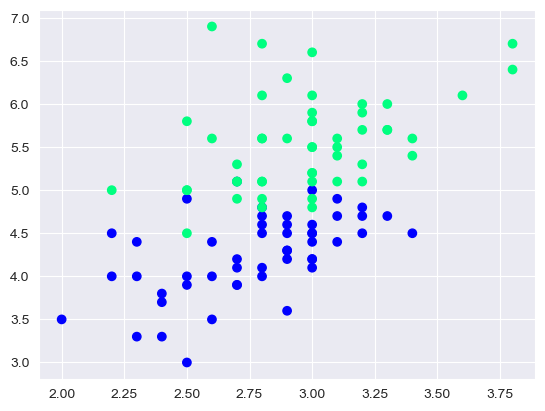

In [8]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [9]:
df.shape

(100, 3)

### split train(10) -> X_train, y_train         {training(8-by sampling)} 
### individual_testing(5) - >X_test,y_test   {individual model testing testing}
###  voting_testing(5)                       {at the time of voting}

In [10]:
# shuffle 
df = df.sample(100)


df_train = df.iloc[:60].sample(10)
individual_testing = df.iloc[60:80].sample(5)
voting_testing = df.iloc[80:].sample(5)

In [11]:
repeating_rows = pd.merge(df_train, individual_testing, how='inner')
repeating_rows = pd.merge(repeating_rows, voting_testing, how='inner')

if not repeating_rows.empty:
    print("Repeating rows found:")
    print(repeating_rows)
else:
    print("No repeating rows found.")

No repeating rows found.


In [12]:
X_individual_testing = individual_testing.iloc[:,:2].values
y_individual_testing = individual_testing.iloc[:,2].values

In [13]:
# Evaluate function

def evaluate(clf, X_train, y_train):
    clf.fit(X_train,y_train)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X_train.values,y_train.values,clf=clf,legend=2)
    y_pred = clf.predict(X_individual_testing)
    print(accuracy_score(y_individual_testing,y_pred))

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

# Types of bootstrapping

# 2. Pasting

#### 1st Tree

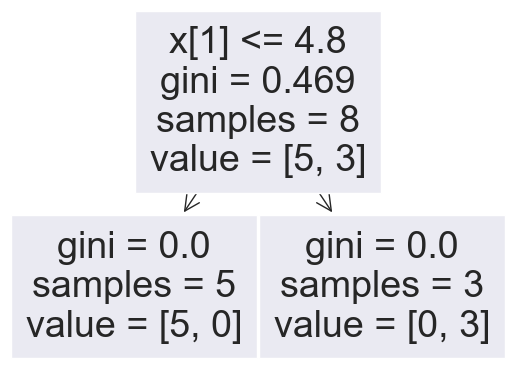

1.0


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


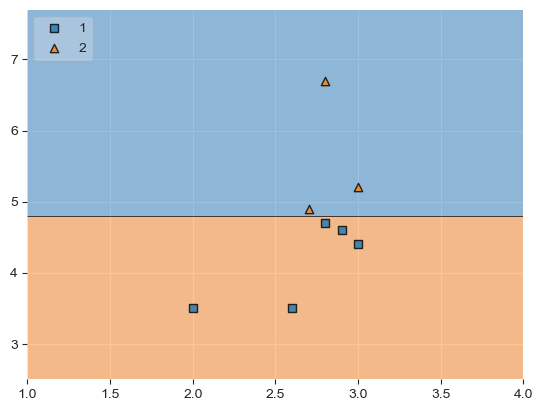

In [15]:
bf_tree1 = df_train.sample(8,replace=False)

X_train1 = bf_tree1.iloc[:,:-1]
y_train1 = bf_tree1.iloc[:,-1]

dt1 = DecisionTreeClassifier()
evaluate(dt1,X_train1,y_train1) 

#### 2nd Tree

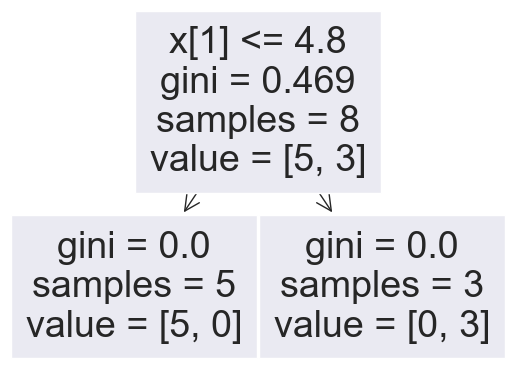

1.0


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


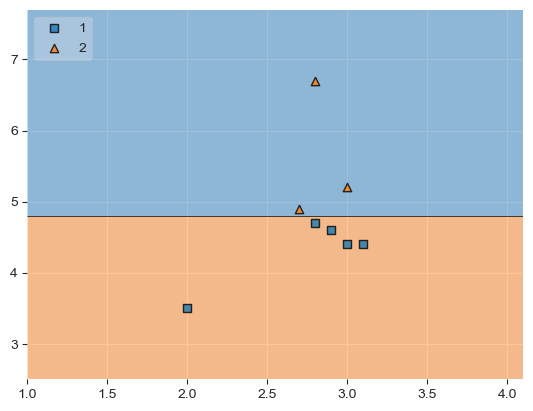

In [16]:
bf_tree2 = df_train.sample(8,replace=False)

X_train2 = bf_tree2.iloc[:,:-1]
y_train2 = bf_tree2.iloc[:,-1]

dt2 = DecisionTreeClassifier()
evaluate(dt2,X_train2,y_train2) 

#### 3rd Tree

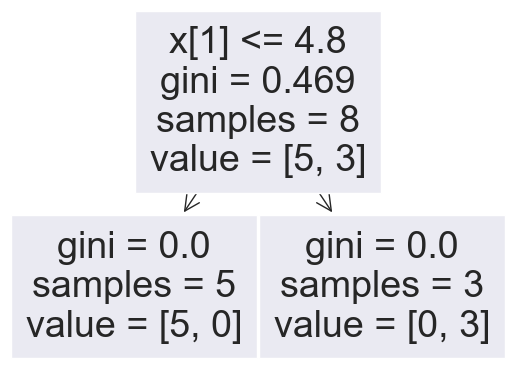

1.0


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


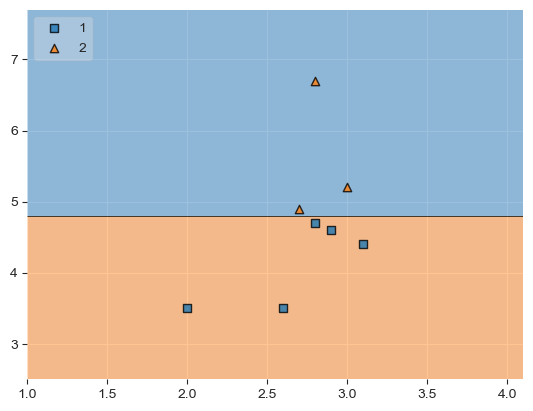

In [17]:
bf_tree3 = df_train.sample(8,replace=False)

X_train3 = bf_tree3.iloc[:,:-1]
y_train3 = bf_tree3.iloc[:,-1]

dt3 = DecisionTreeClassifier()
evaluate(dt3,X_train3,y_train3) 

## Individual model Prediction

In [21]:
voting_testing

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
114,2.8,5.1,2
128,2.8,5.6,2
62,2.2,4.0,1
140,3.1,5.6,2


In [22]:
print("Predictor 1",dt1.predict(np.array([3,5.9]).reshape(1,2)))
print("Predictor 2",dt2.predict(np.array([3,5.9]).reshape(1,2)))
print("Predictor 3",dt3.predict(np.array([3,5.9]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
